Missing values before handling:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

📈 Logistic Regression Results:
Accuracy: 0.6280487804878049
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656


🌳 Decision Tree Results:
Accuracy: 0.5777439024390244
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       412
           1       0.44      0.51      0.47       244

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


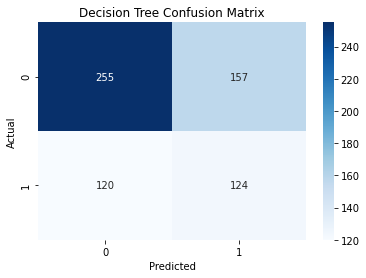

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load dataset (use your dataset file)
df = pd.read_csv('water_potability.csv')  

# Step 3: Check for missing values
print("Missing values before handling:\n", df.isnull().sum())

# Step 4: Fill missing values (e.g., with mean)
df = df.fillna(df.mean(numeric_only=True))

# Step 5: Split into features and target
X = df.drop('Potability', axis=1)  # Features
y = df['Potability']              # Target

# Step 6: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Build and train classification models

## Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

## Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)  # No need to scale for trees

# Step 9: Make predictions
log_preds = log_model.predict(X_test_scaled)
tree_preds = tree_model.predict(X_test)

# Step 10: Evaluate models
print("\n📈 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, log_preds))
print(classification_report(y_test, log_preds))

print("\n🌳 Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, tree_preds))
print(classification_report(y_test, tree_preds))

# Step 11: Confusion Matrix (visual)
conf_matrix = confusion_matrix(y_test, tree_preds)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
